In [27]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [28]:
import plotly.express as px

In [29]:
# pip install plotly==4.10.0

In [30]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.000000,-8.9,1659.504098,1.100434,5.0,ratio
1,ratio_6,dynamic,12669.298020,38.258298,166.480672,1633.857958,23.307294,-12.4,1657.165252,3.439280,6.0,ratio
2,ratio_7,dynamic,12614.408659,36.911936,160.901631,1608.333614,45.052457,-15.5,1653.386070,7.218462,7.0,ratio
3,ratio_8,dynamic,12561.314479,35.871759,156.325988,1583.498920,65.656915,-17.9,1649.155835,11.448697,8.0,ratio
4,ratio_9,dynamic,12499.298894,34.846755,151.565652,1558.929124,84.876765,-20.3,1643.805889,16.798643,9.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
145,lag_10,static,12650.774773,37.705920,166.022406,1654.892784,0.000000,-13.7,1654.892784,5.711748,10.0,lag
146,lag_15,static,12569.722962,36.522687,159.741336,1647.942280,0.000000,-16.4,1647.942280,12.662252,15.0,lag
147,lag_20,static,12545.492119,36.223805,158.587914,1645.357357,0.000000,-17.1,1645.357357,15.247175,20.0,lag
148,lag_25,static,12524.008130,35.549772,156.022406,1644.145454,0.000000,-18.6,1644.145454,16.459078,25.0,lag


In [31]:
plot_dt_long = pd.melt(perfomances_dt5, id_vars=['policy','policy_name','policy_val', 'NMS'], value_vars=['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance'])
# plot_dt_long['policy_name'][plot_dt_long['policy_name'] == 'red'] = 'reduction'
plot_dt_long['policy_NMS'] = plot_dt_long['policy_name']+'_'+ plot_dt_long['NMS']
plot_dt_long

,policy,policy_name,policy_val,NMS,variable,value,policy_NMS
0,ratio_5,ratio,5.0,dynamic,N_fert,172.575003,ratio_dynamic
1,ratio_6,ratio,6.0,dynamic,N_fert,166.480672,ratio_dynamic
2,ratio_7,ratio,7.0,dynamic,N_fert,160.901631,ratio_dynamic
3,ratio_8,ratio,8.0,dynamic,N_fert,156.325988,ratio_dynamic
4,ratio_9,ratio,9.0,dynamic,N_fert,151.565652,ratio_dynamic
...,...,...,...,...,...,...,...
895,lag_10,lag,10.0,static,net_balance,1654.892784,lag_static
896,lag_15,lag,15.0,static,net_balance,1647.942280,lag_static
897,lag_20,lag,20.0,static,net_balance,1645.357357,lag_static
898,lag_25,lag,25.0,static,net_balance,1644.145454,lag_static


In [32]:
# Add a point at the 20% reduction
percent20_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/percent20_dt.rds")[None] # also works for RData
percent20_dt = percent20_dt[['NMS','policy']]
percent20_dt
# #Filter the rows that are in the 20 percent
keys = list(percent20_dt.columns.values)
i1 = plot_dt_long.set_index(keys).index
i2 = percent20_dt.set_index(keys).index
plot_dt_points = plot_dt_long[i1.isin(i2)].reset_index()
plot_dt_points

,index,policy,policy_name,policy_val,NMS,variable,value,policy_NMS
0,4,ratio_9,ratio,9.00,dynamic,N_fert,151.565652,ratio_dynamic
1,12,leach_4,leach,4.00,dynamic,N_fert,154.254863,leach_dynamic
2,24,bal_0.75,bal,0.75,dynamic,N_fert,151.631888,bal_dynamic
3,41,red_11,red,11.00,dynamic,N_fert,153.518711,red_dynamic
4,77,ratio_14,ratio,14.00,static,N_fert,149.741336,ratio_static
5,88,leach_8,leach,8.00,static,N_fert,149.741336,leach_static
6,98,bal_1.5,bal,1.50,static,N_fert,149.741336,bal_static
7,129,red_18.5,red,18.50,static,N_fert,151.153422,red_static
8,154,ratio_9,ratio,9.00,dynamic,Y_corn,12499.298894,ratio_dynamic
9,162,leach_4,leach,4.00,dynamic,Y_corn,12554.147891,leach_dynamic


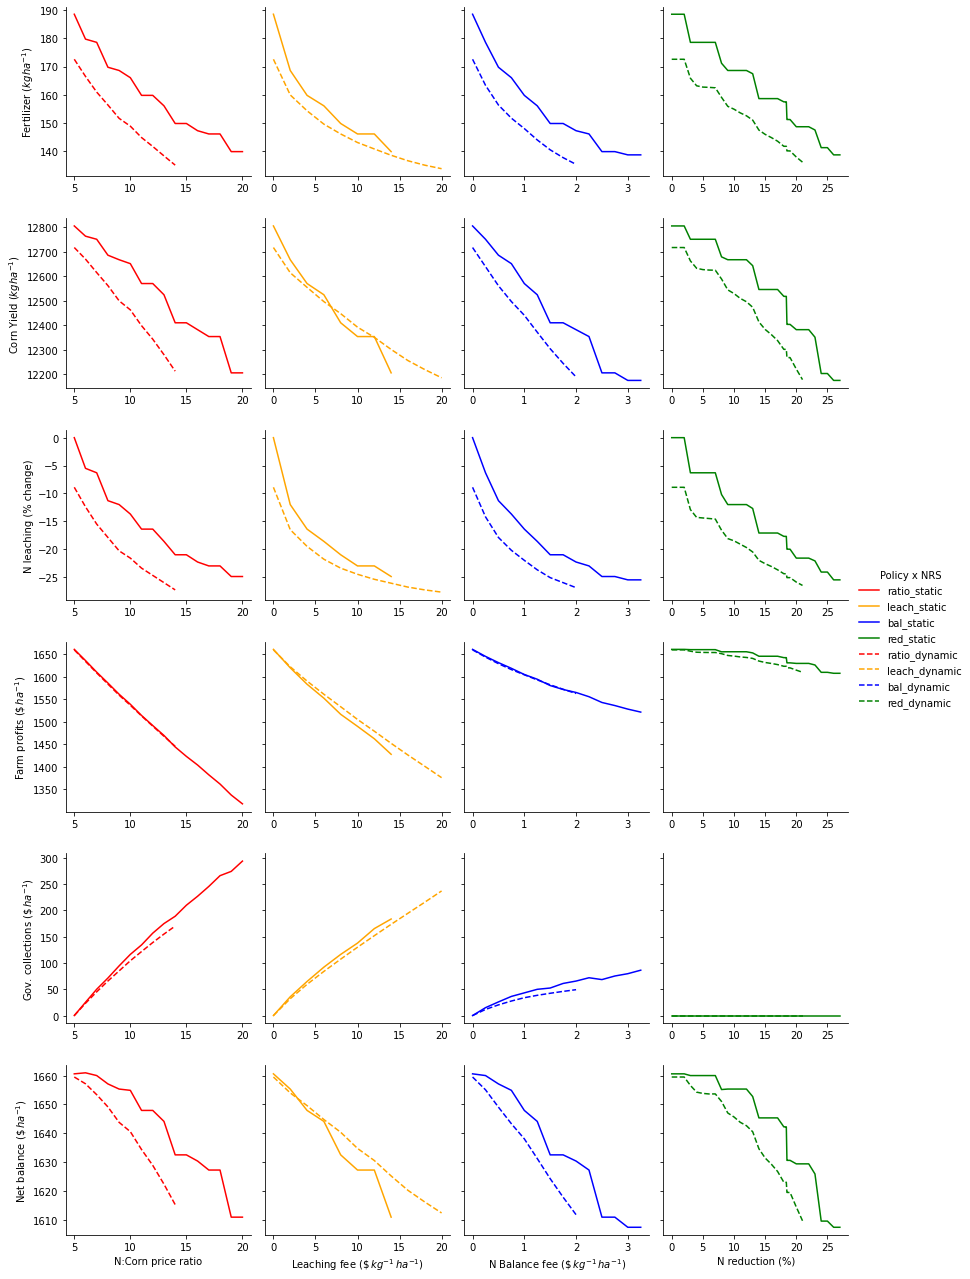

In [33]:
# importing packages 
import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['green', 'green'], 'linestyle' : ["-","--"]}
kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

graph = seaborn.FacetGrid(plot_dt_long, row ='variable', col ='policy_name', hue ='policy_NMS', 
                          sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
                          hue_order = ['ratio_static', 'leach_static', 'bal_static', 'red_static', 'ratio_dynamic', 'leach_dynamic', 'bal_dynamic', 'red_dynamic'],    
                          col_order = ['ratio', 'leach', 'bal', 'red'],
                          row_order = ['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance']) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy x NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

graph.axes[5,0].set_xlabel('N:Corn price ratio')
graph.axes[5,1].set_xlabel(r'Leaching fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,2].set_xlabel(r'N Balance fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,3].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel(r'Fertilizer ($kg ha^{-1}$)')
graph.axes[1,0].set_ylabel(r'Corn Yield ($kg ha^{-1}$)')
graph.axes[2,0].set_ylabel('N leaching (% change)')
graph.axes[3,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[4,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[5,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
    axes_n.tick_params(labelbottom=True)  
# show the object 

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')
  
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')    

In [8]:
# ONLY FOUR PANELS (SEMINAR)
list_of_values = ['L_change', 'P', 'G', 'net_balance']
plot_dt_long2 = plot_dt_long[plot_dt_long['variable'].isin(list_of_values)]


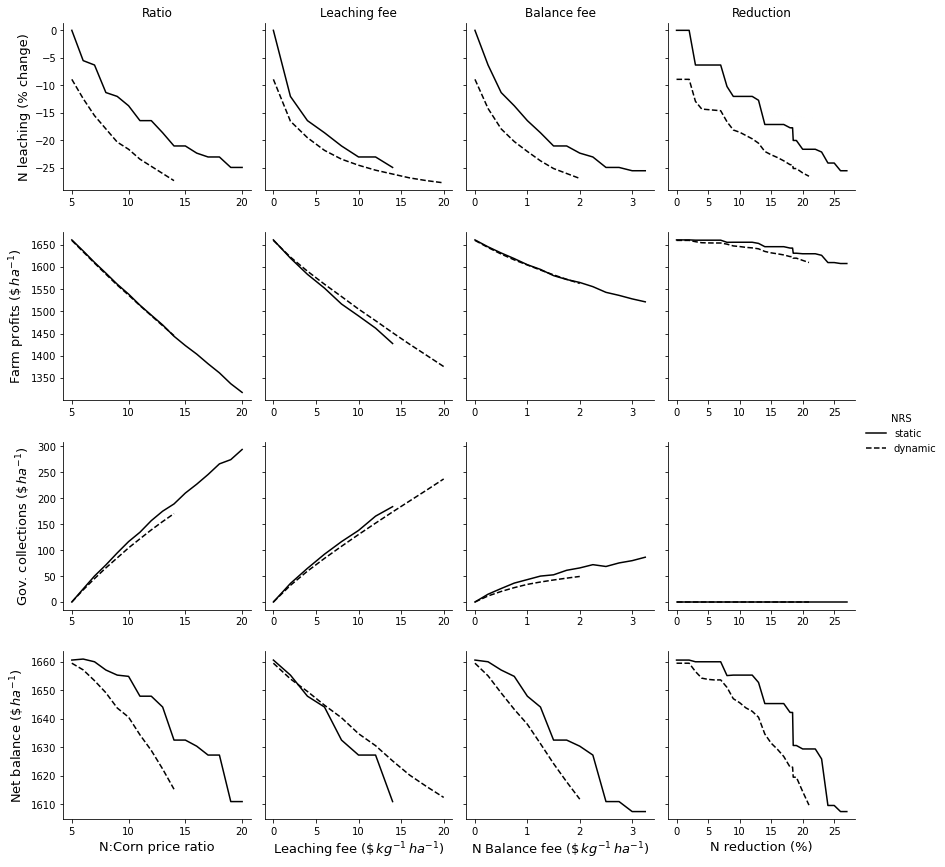

In [26]:

import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['black', 'black'], 'linestyle' : ["-","--"]}
# kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue ='NMS', 
                          sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
                          hue_order = ['static', 'dynamic'],    
                          col_order = ['ratio', 'leach', 'bal', 'red'],
                          row_order = ['L_change', 'P', 'G', 'net_balance']) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

graph.axes[3,0].set_xlabel('N:Corn price ratio',fontsize=13)
graph.axes[3,1].set_xlabel(r'Leaching fee $(\$ \/ kg^{-1}\/ ha^{-1})$',fontsize=13)
graph.axes[3,2].set_xlabel(r'N Balance fee $(\$ \/ kg^{-1}\/ ha^{-1})$',fontsize=13)
graph.axes[3,3].set_xlabel('N reduction (%)',fontsize=13)

# graph.axes[0,0].set_ylabel(r'Fertilizer ($kg ha^{-1}$)')
# graph.axes[1,0].set_ylabel(r'Corn Yield ($kg ha^{-1}$)')
graph.axes[0,0].set_ylabel('N leaching (% change)',fontsize=13)
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)',fontsize=13)
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)',fontsize=13)
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)',fontsize=13)


axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
    axes_n.tick_params(labelbottom=True)  
# show the object 

graph.axes[0,0].set_title("Ratio")
graph.axes[0,1].set_title("Leaching fee")
graph.axes[0,2].set_title("Balance fee")
graph.axes[0,3].set_title("Reduction")

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python_seminar.png"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')
  
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python_seminar.pdf"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')    

In [ ]:
plot_dt_long2 = plot_dt_long[plot_dt_long['NMS'] == 'static']
plot_dt_long2

In [ ]:
# No DYNAMIC 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['red', 'orange', 'blue']}
graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue = 'policy_name',sharey = False, sharex = False, margin_titles=False, hue_kws=kw) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy') 
#graph.legend.texts[0].set_text("Whatever else")
graph.axes[3,0].set_xlabel('N:Corn price ratio')
graph.axes[3,1].set_xlabel(r'Fee on leaching $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[3,2].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel('N leaching (% change)')
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
# show the object 
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"

graph.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"

graph.savefig(plot_file_name, dpi=300)
  
    
# https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid    
# This code is contributed by Deepanshu Rustagi.

In [ ]:
import seaborn as sns

att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

#this surpresses the x- and y-labels on each axes of the bottom/leftmost column
# g.set_axis_labels('', '') 

# # overall ylabel
# g.fig.text(x=0, y=0.5, 
#            verticalalignment='center', #make sure it's aligned at center vertically
#            s='Alcohol % per volume', #this is the text in the ylabel
#            size=16, #customize the fontsize if you will
#            rotation=90) #vertical text

#overall xlabel
# g.fig.text(x=0.5, y=0, 
#            horizontalalignment='center', #make sure it's aligned at center horizontally
#            s='Density $g/cm^3$', #this is the text in the xlabel
#            size=16)

In [ ]:
df
